# Group 31: Placement Prediction

**Group members:** Jeff Hu, Daniel Truong, Longyi Yuan, Mohith Baskaran

**Course:** STAT 301

**Date:** April 7th

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(dplyr)
library(cowplot)
library(broom)
library(rsample)
library(MASS)      
library(caret)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following obje

# I. Introduction:

Let’s set the scene: securing a job placement has always been a big concern for many students, especially in a climate where everyone’s hustling hard. Colleges encourage skill-building activities (like internships, projects, and workshops), emphasizing both hard skills and soft skills, hoping these experiences increase the odds of landing a job. Naturally, we can’t overlook traditional academic performance measures such as CGPA, SSC, and HSC marks. And that’s where our dataset steps in, providing detailed info on academic achievements, skill-enhancement activities, personal attributes (like AptitudeTestScore and SoftSkillRating), and whether or not a student got placed.

With so many facets playing into job outcomes, we want to explore whether a particular factor—like CGPA, internship count, or extracurricular involvement—actually connects with better placement prospects. This question is important not just for students to plan their college activities, but also for educational institutions looking to refine their training programs.

**Research Question**

**Can academic achievements, skill-enhancement activities, and personal attributes predict a student’s job placement success?**

**Goal:**

- Identify statistically significant predictors of job placement using logistic regression.
  
- Assess the predictive accuracy of the model for supplementary insights.

**Response Variable:** PlacementStatus (binary: Placed or Not Placed).

**Predictor Variables of Interest:**

- **Academic Achievements:**

    - CGPA (cumulative GPA)
      
    - SSC_Marks (senior secondary marks)
 
      
    - HSC_Marks (higher secondary marks)

- **Skill-Enhancement Activities:**

    - Internships (number completed)
    
    - Projects (number completed)

    - Workshops/Certifications (number attended)

- **Personal Attributes:**

    - AptitudeTestScore (quantitative/logic score)
      
    - SoftSkillRating (communication skills rating)

    - ExtracurricularActivities (participation: Yes/No)
Primary Focus: Inference
The main objective is to understand and interpret the associations between predictors and placement outcomes. While predictive performance (e.g., accuracy, AUC-ROC) is explored, the emphasis remains on identifying which factors most strongly influence placement likelihood. This prioritizes actionable insights for students and educators over pure predictive power.

# II. Methods and results:

# a) Data

## Data description

Below is a summary table of the dataset variables: The dataset contains 10000 observations and 11 variables, each representing an individual student. The variables capture a range of academic, personal, and training-related characteristics that may influence whether a student is placed or not. The table below describes all the varlables in the dataset.

In [2]:
summary_table <- data.frame(
  Variable = c(
    "CGPA", "Internships", "Projects", "Workshops/Certifications",
    "ApptitudeTestScore", "SoftSkillrating", "ExtraCurricularActivities",
    "PlacementTraining", "SSC", "HSC", "PlacementStatus"
  ),
  Type = c(
    "Numeric", "Integer", "Integer", "Integer",
    "Numeric", "Numeric", "Integer",
    "Binary (0 = No, 1 = Yes)", "Numeric", "Numeric", "Categorical"
  ),
  Description = c(
    "Overall grades achieved by the student",
    "Number of internships a student has done",
    "Number of projects a student has completed",
    "Online courses taken to upskill themselves",
    "Score from aptitude tests (Quant & logic)",
    "Soft skill (e.g., communication) rating",
    "Involvement in non-academic activities",
    "Whether placement training was taken",
    "Senior Secondary marks",
    "Higher Secondary marks",
    "Target variable: Placed or Not Placed"
  )
)
summary_table

Variable,Type,Description
<chr>,<chr>,<chr>
CGPA,Numeric,Overall grades achieved by the student
Internships,Integer,Number of internships a student has done
Projects,Integer,Number of projects a student has completed
Workshops/Certifications,Integer,Online courses taken to upskill themselves
ApptitudeTestScore,Numeric,Score from aptitude tests (Quant & logic)
SoftSkillrating,Numeric,"Soft skill (e.g., communication) rating"
ExtraCurricularActivities,Integer,Involvement in non-academic activities
PlacementTraining,"Binary (0 = No, 1 = Yes)",Whether placement training was taken
SSC,Numeric,Senior Secondary marks


In [3]:
url <- "https://raw.githubusercontent.com/Arcyill/STAT-301-Project/refs/heads/main/placementdata.csv"

placementData <- read.csv(url)

## Source and Information
The dataset used in this analysis is from the Kaggle Placement Prediction Dataset and was collected to study student placement outcomes based on academic performance, training efforts, and personal attributes.

• Data Source: Kaggle

• Collection Method: The dataset consists of 10,000 student records, each with 11 variables capturing academic scores, skill-building activities, and placement status.

• Citation: https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data

## Pre-selection

While it may be hard to determine what vairables to drop at this stage, we can drop StudentID because it just a unique identifier for each student, meaning it has no predictive power or meaningful relationship with PlacementStatus. Removing it will prevent unnecessary noise in our analysis and improve model interpretability


In [4]:
placementData <- placementData |>
    dplyr::select(-StudentID)

head(placementData)

,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


## Data cleaning

In [5]:
placementData <- placementData |> drop_na()
head(placementData)

,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced


# b) Exploratory Data Analysis (EDA)

### Visualization 1

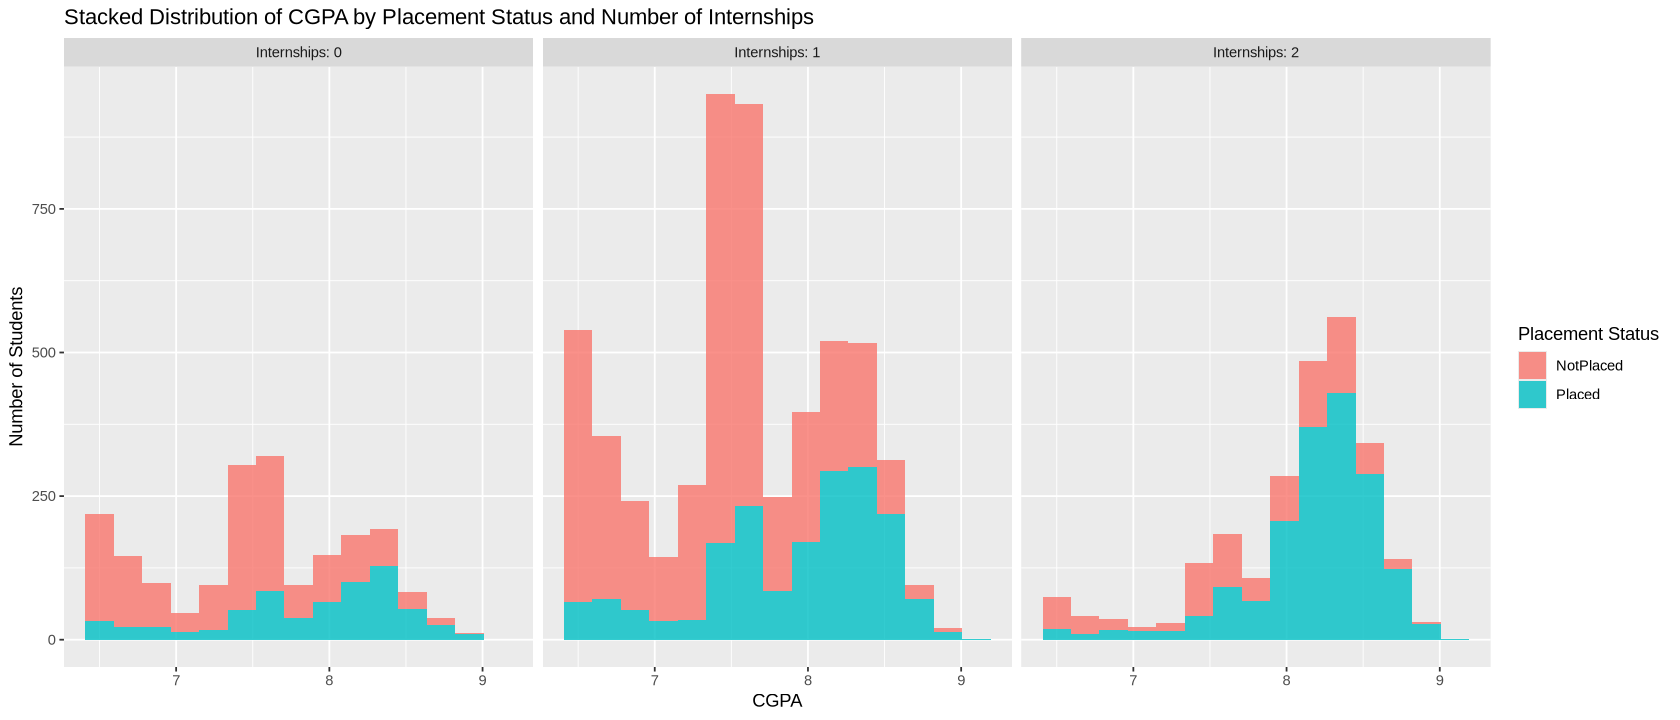

In [6]:
options(repr.plot.width = 14, repr.plot.height = 6) #changing the dimensions of the graph



ggplot(placementData, aes(x = CGPA, fill = PlacementStatus)) + 
  geom_histogram(position = "stack", alpha = 0.8, bins = 15) + #stacked histograms of CGPA filled by PlacementStatus
  facet_wrap(~ Internships, labeller = label_both) + #splitting the plots based on the number of internships.  
  labs( 
    title = "Stacked Distribution of CGPA by Placement Status and Number of Internships",
    x = "CGPA",
    y = "Number of Students",
    fill = "Placement Status" 
  )#Labels

The stacked histograms illustrate the distribution of students' CGPA, differentiated by Placement Status (using colour) and separated by the number of internships. From the plot, students with higher CGPA tend to secure placements more frequently, especially noticeable among students who, despite having no internships, have more placements than not placed. The plot also reveals that students with two internships show a higher likelihood of placement, even at somewhat lower CGPAs. Conversely, there's little visible distinction between students with zero or one internship in terms of CGPA distribution or placement outcomes.

There is also a noticeable trend in CGPA distribution based on internship experience. This could be because students who actively pursue internships tend to maintain higher CGPAs overall or vice versa, as evident in the fact that students with 2 internships exhibit a distribution that's left-skewed (higher CGPAs), whereas students with 0 internships exhibit a right-skewed distribution (moderate to lower CGPAs).

This visualization is relevant because it helps us explore the relationship between academic performance, practical experience, and placement success. The plot highlights that CGPA is a key factor in placement but also shows that internships may influence placement likelihood independently of GPA. By faceting the histogram by internship experience, we can observe how CGPA distributions shift based on the number of internships, revealing that students with more internships tend to have both higher CGPAs and higher placement rates. This is crucial for the inference question stated earlier, as it suggests that both academic achievement and internship experience may be important in securing a job placement.

This is important because it means that excluding either one of these variables could lead to omitted variable bias. For example, if we were to exclude internships from our analysis, our model might overestimate the impact of CGPA on placement success, failing to account for the fact that internships provide an alternative pathway to placement, even for students with moderate CGPAs. On the other hand, omitting CGPA could lead to overstating the effect of internships, ignoring the clear trend that students with higher GPAs are generally more likely to be placed, regardless of internship experience. Therefore, our model should include both CGPA and internships at the very least.

### Visualization 2

The function in R to fit a logistic regression requires either a numerical response (0 and 1) or a `factor`, with two levels (note that R stores factors as integers). 

Mathematically, we have to construct a binary response $Y_i$ that flags the successes for a given event of interest: 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th observation is Placed},\\
0 \; \; \; \; 	\mbox{if the $i$th observation is NotPlaced}
\end{cases}
$$

Therefore, we will change PlacementStatus with values consisting of 1s and 0s. 

In [7]:
placementData <- placementData %>%
#We will do the same with other binary data
        mutate(ExtracurricularActivities = if_else(ExtracurricularActivities == "Yes", 1, 0),       
        PlacementTraining = if_else(PlacementTraining == "Yes", 1, 0),
        PlacementStatus = if_else(PlacementStatus == "Placed", 1, 0))
head(placementData)


,CGPA,Internships,Projects,Workshops.Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,8.9,0,3,2,90,4.0,1,1,78,82,1
3,7.3,1,2,2,82,4.8,1,0,79,80,0
4,7.5,1,1,2,85,4.4,1,1,81,80,1
5,8.3,1,2,2,86,4.5,1,1,74,88,1
6,7.0,0,2,2,71,4.2,1,0,55,66,0


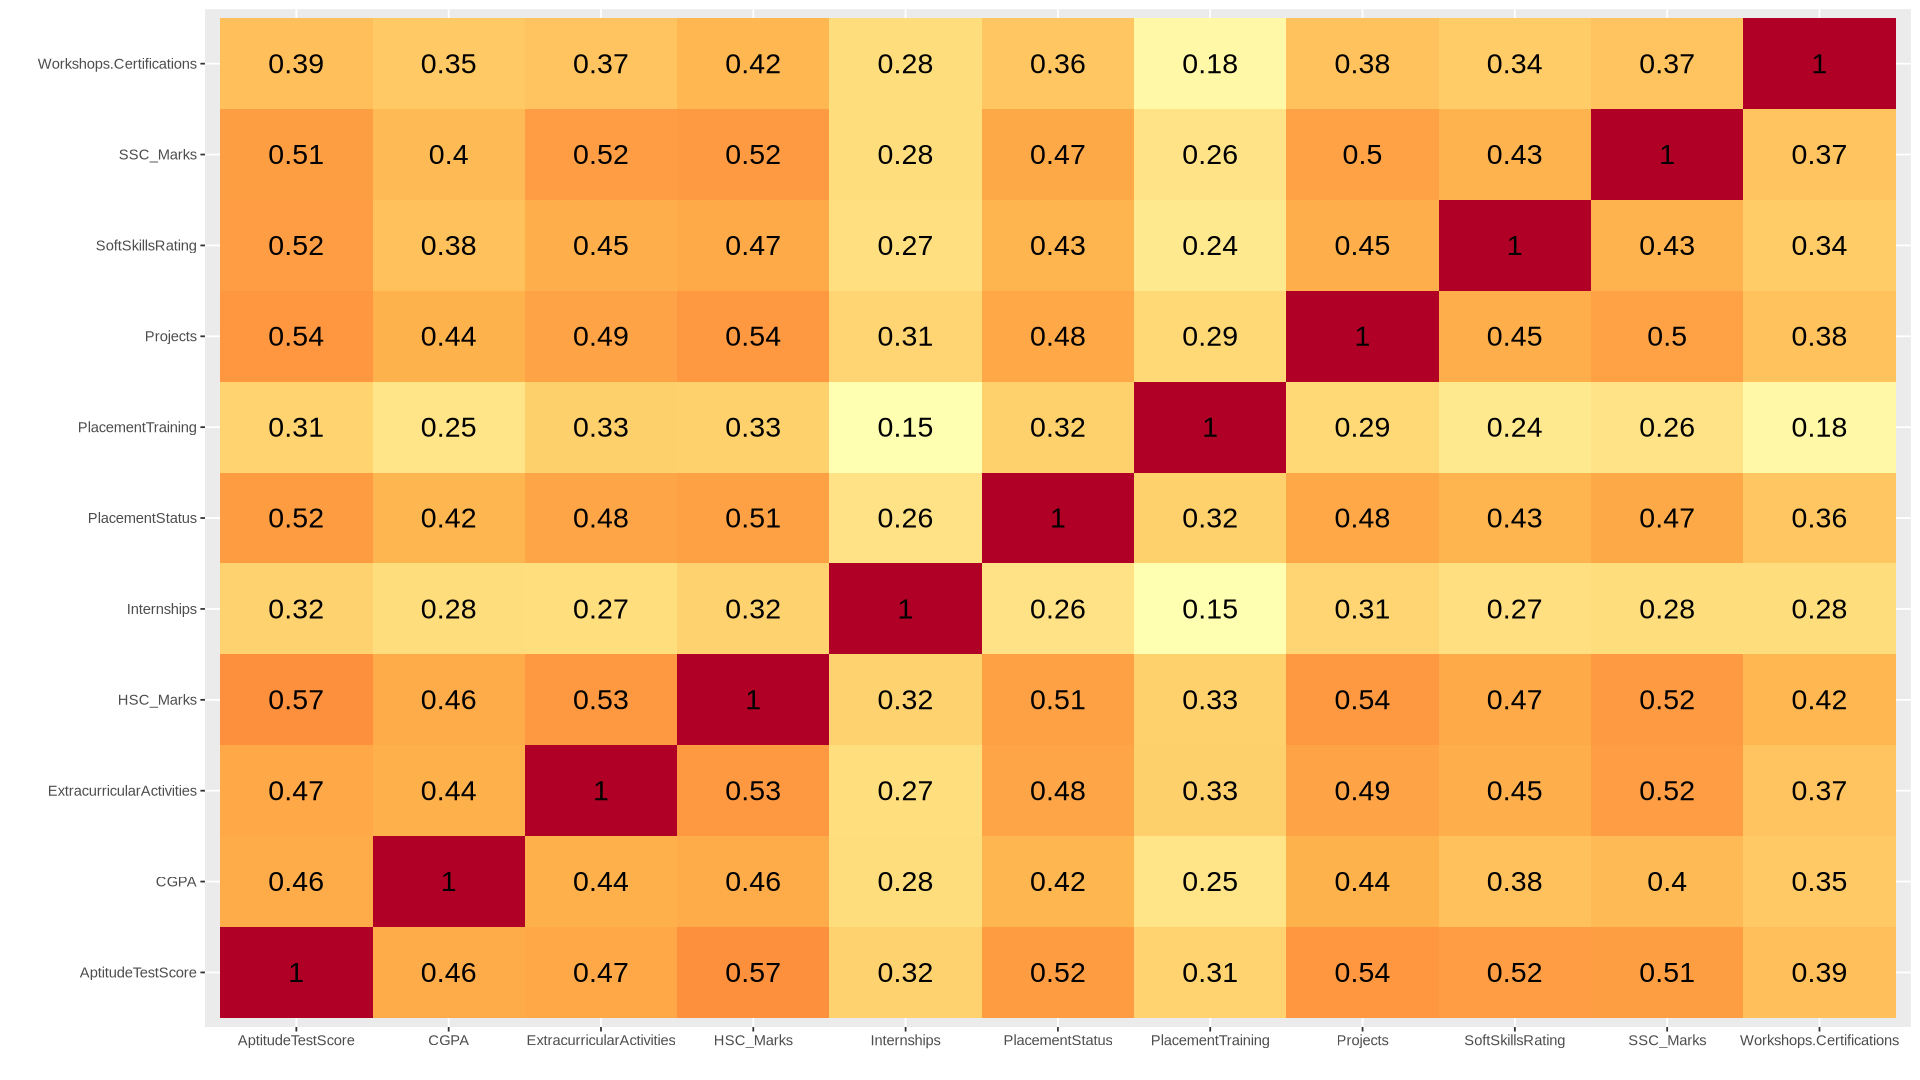

In [8]:

options(repr.plot.width = 16, repr.plot.height = 9)


data_heatgraph <- placementData |> 
  cor() |>  #Compute correlation matrix for all numeric variables
  as.data.frame() |> # Convert matrix to dataframe 
  rownames_to_column(var = "var1") |>
  pivot_longer(-var1, names_to = "var2", values_to = "corr") 

# Build the heatmap visualization
heatgraph <- data_heatgraph |> 
  ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr)) +  #Create heatmap tiles colored by correlation strength
    scale_fill_distiller(
      "Correlation Coefficient \n",
      palette = "YlOrRd",
      direction = 1
    ) +  #Apply color scale
    labs(x = "", y = "") + # Remove axis labels
    geom_text(
      aes(label = round(corr, 2)),
      color = "black",
      size = 6 
    ) +  # Add correlation values as text labels
    theme(legend.position = "none")  # Remove legend

# Display the plot
heatgraph

# c) Methods: Plan